# Exercise with Capital Bikeshare data

## Introduction

- Capital Bikeshare dataset from Kaggle: [data](https://github.com/justmarkham/DAT8/blob/master/data/bikeshare.csv), [data dictionary](https://www.kaggle.com/c/bike-sharing-demand/data)
- Each observation represents the bikeshare rentals initiated during a given hour of a given day

In [19]:
%matplotlib inline
import pandas as pd
import numpy as np
from sklearn.model_selection import train_test_split, cross_val_score
from sklearn import metrics

In [5]:
# read the data and set "datetime" as the index
url = 'https://raw.githubusercontent.com/justmarkham/DAT8/master/data/bikeshare.csv'
bikes = pd.read_csv(url, index_col='datetime', parse_dates=True)

In [6]:
# "count" is a method, so it's best to rename that column
bikes.rename(columns={'count':'total'}, inplace=True)

In [7]:
# create "hour" as its own feature
bikes['hour'] = bikes.index.hour

In [8]:
bikes.head()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2011-01-01 00:00:00,1,0,0,1,9.84,14.395,81,0.0,3,13,16,0
2011-01-01 01:00:00,1,0,0,1,9.02,13.635,80,0.0,8,32,40,1
2011-01-01 02:00:00,1,0,0,1,9.02,13.635,80,0.0,5,27,32,2
2011-01-01 03:00:00,1,0,0,1,9.84,14.395,75,0.0,3,10,13,3
2011-01-01 04:00:00,1,0,0,1,9.84,14.395,75,0.0,0,1,1,4


In [9]:
bikes.tail()

,season,holiday,workingday,weather,temp,atemp,humidity,windspeed,casual,registered,total,hour
datetime,,,,,,,,,,,,
2012-12-19 19:00:00,4,0,1,1,15.58,19.695,50,26.0027,7,329,336,19
2012-12-19 20:00:00,4,0,1,1,14.76,17.425,57,15.0013,10,231,241,20
2012-12-19 21:00:00,4,0,1,1,13.94,15.910,61,15.0013,4,164,168,21
2012-12-19 22:00:00,4,0,1,1,13.94,17.425,61,6.0032,12,117,129,22
2012-12-19 23:00:00,4,0,1,1,13.12,16.665,66,8.9981,4,84,88,23


- **hour** ranges from 0 (midnight) through 23 (11pm)
- **workingday** is either 0 (weekend or holiday) or 1 (non-holiday weekday)

## Task 1

Run these two `groupby` statements and figure out what they tell you about the data.

In [7]:
# mean rentals for each value of "workingday"
bikes.groupby('workingday').total.mean()

workingday
0    188.506621
1    193.011873
Name: total, dtype: float64

In [8]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean()

hour
0      55.138462
1      33.859031
2      22.899554
3      11.757506
4       6.407240
5      19.767699
6      76.259341
7     213.116484
8     362.769231
9     221.780220
10    175.092308
11    210.674725
12    256.508772
13    257.787281
14    243.442982
15    254.298246
16    316.372807
17    468.765351
18    430.859649
19    315.278509
20    228.517544
21    173.370614
22    133.576754
23     89.508772
Name: total, dtype: float64

## Task 2

Run this plotting code, and make sure you understand the output. Then, separate this plot into two separate plots conditioned on "workingday". (In other words, one plot should display the hourly trend for "workingday=0", and the other should display the hourly trend for "workingday=1".)

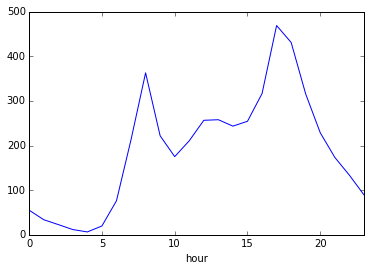

In [9]:
# mean rentals for each value of "hour"
bikes.groupby('hour').total.mean().plot()

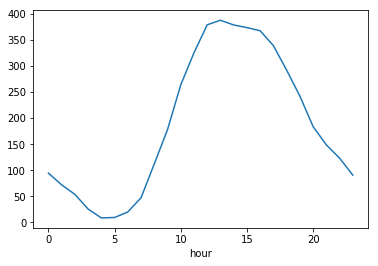

In [42]:
# hourly rental trend for "workingday=0"
bikes[bikes.workingday==0].groupby('hour').total.mean().plot()

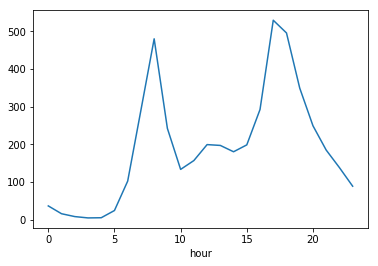

In [43]:
# hourly rental trend for "workingday=1"
bikes[bikes.workingday==1].groupby('hour').total.mean().plot()

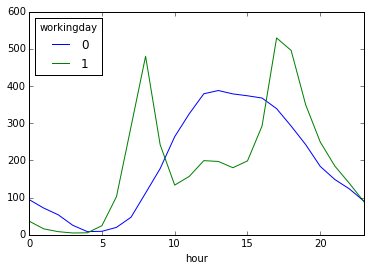

In [12]:
# combine the two plots
bikes.groupby(['hour', 'workingday']).total.mean().unstack().plot()

## Task 3

Create a decision Tree to predict the total number of bikeshare customers

- Create a train/test split
- Use at least two features of your choice
- Evaluate the model using the root mean squared error

In [45]:
# set your features and response
feature_cols = ['holiday', 'workingday', 'weather','temp', 'humidity','windspeed', 'hour']
X = bikes[feature_cols] 
y = bikes.total

# create a train test split
X_train, X_test, y_train, y_test = train_test_split(X, y)

In [48]:
from sklearn.tree import DecisionTreeRegressor

# instantiate a decision tree (regression model)
tree = DecisionTreeRegressor()

# fit the model
tree.fit(X_train, y_train)

# create and store predictions
y_pred = tree.predict(X_test)

# evaluate the model
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

101.96676858499023

## Task 4 - Observe feature importances and improve the decision tree

Improve the model by trying different features or model hyperparameters

In [49]:
# observe the feature_importances_
pd.DataFrame(list(zip(feature_cols, tree.feature_importances_)))

,0,1
0,holiday,0.003979
1,workingday,0.063350
2,weather,0.024322
3,temp,0.167840
4,humidity,0.085067
5,windspeed,0.049177
6,hour,0.606266


In [50]:
# improve the decison tree

# instantiate a decision tree (regression model)
tree = DecisionTreeRegressor(max_depth=7)

# fit the model
tree.fit(X_train, y_train)

# create and store predictions
y_pred = tree.predict(X_test)

# evaluate the model
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

93.94336687189447

## Task 5

Repeat the process with the following models:

- sklearn.ensemble.BaggingRegressor (using a DecisionTreeRegressor)
- sklearn.ensemble.RandomForestRegressor

Tune the hyperparameters of each model

In [37]:
from sklearn.ensemble import BaggingRegressor

# instantiate a decision tree (regression model)
tree = DecisionTreeRegressor()
bagreg = BaggingRegressor(tree, n_estimators=500, bootstrap=True, oob_score=True, random_state=42)

# fit the model
bagreg.fit(X_train, y_train)

# create and store predictions
y_pred = bagreg.predict(X_test)

# evaluate the model
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

75.94925917211899

In [38]:
from sklearn.ensemble import RandomForestRegressor

# instantiate a decision tree (regression model)
rf = RandomForestRegressor(n_estimators=100)

# fit the model
rf.fit(X_train, y_train)

# create and store predictions
y_pred = rf.predict(X_test)

# evaluate the model
np.sqrt(metrics.mean_squared_error(y_test, y_pred))

76.62692646541335

## Task 5

Use 5-fold cross-validation to evaluate a decision tree model with those same features (fit to any "max_depth" you choose).

In [39]:
# cross validation with a decision tree
treereg = DecisionTreeRegressor(random_state=42)

scores = cross_val_score(treereg, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

124.45380295120363

In [40]:
# cross validation with a bagging regressor
tree = DecisionTreeRegressor()
bagreg = BaggingRegressor(tree, n_estimators=500, bootstrap=True, oob_score=True, random_state=42)

scores = cross_val_score(bagreg, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

101.02584762215356

In [41]:
rf = RandomForestRegressor(n_estimators=100)

scores = cross_val_score(rf, X, y, cv=5, scoring='neg_mean_squared_error')
np.mean(np.sqrt(-scores))

101.27450567537169

## Select the best model and continue to improve by creating your own new features